# Линейная алгебра, математический анализ

Расчет ошибок аппроксимации
Ранг r = 2, ошибка E(r) = 96.4474
Ранг r = 20, ошибка E(r) = 68.1176
Ранг r = 40, ошибка E(r) = 43.1581
Ранг r = 60, ошибка E(r) = 23.3592
Ранг r = 80, ошибка E(r) = 8.0781
Ранг r = 100, ошибка E(r) = 0.0000


C:\Users\User\AppData\Local\Temp\ipykernel_20616\302735343.py:48: UserWarning: Glyph 8346 (\N{LATIN SUBSCRIPT SMALL LETTER P}) missing from font(s) Arial.
  plt.tight_layout()


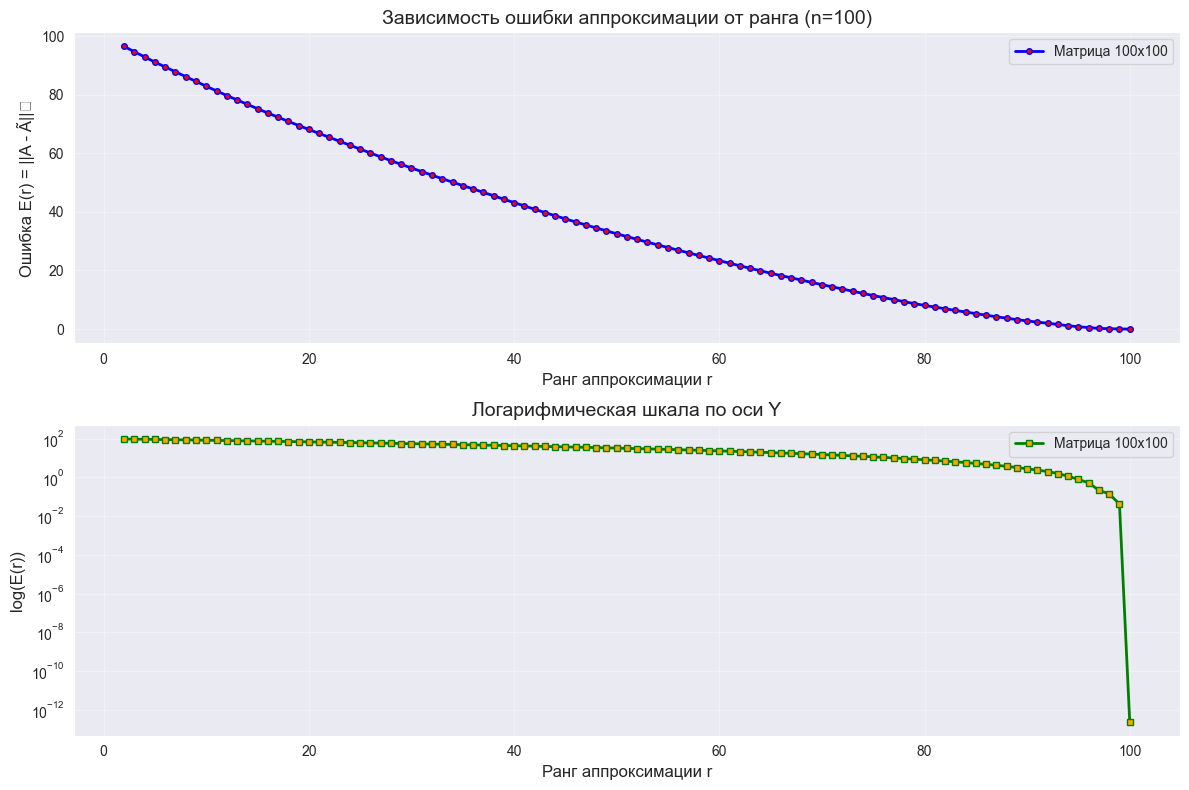


Дополнительная информация:
Сингулярные значения: от 19.70 до 0.04
Сумма квадратов сингулярных значений: 10068.41
Норма Фробениуса исходной матрицы: 100.34

Проверка свойства оптимальности SVD:
Для r = 50:
  Теоретическая ошибка: 32.522612
  Практическая ошибка: 32.522612
  Разница: 7.105427e-15


In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
np.random.seed(42)
A = np.random.randn(n, n)

U, S, Vt = np.linalg.svd(A, full_matrices=True)


print("Расчет ошибок аппроксимации")
max_rank = min(n, 100)
ranks = range(2, max_rank + 1)
errors = []


for r in ranks:
    A_tilde = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]

    # Вычисление ошибки в норме Фробениуса
    error = np.linalg.norm(A - A_tilde, 'fro')
    errors.append(error)

    if r % 20 == 0 or r == 2 or r == max_rank:
        print(f"Ранг r = {r}, ошибка E(r) = {error:.4f}")

# 5. Построение графика
plt.figure(figsize=(12, 8))

# График в обычном масштабе
plt.subplot(2, 1, 1)
plt.plot(ranks, errors, 'b-', linewidth=2, marker='o', markersize=4, markerfacecolor='red')
plt.xlabel('Ранг аппроксимации r', fontsize=12)
plt.ylabel('Ошибка E(r) = ||A - Ã||ₚ', fontsize=12)
plt.title(f'Зависимость ошибки аппроксимации от ранга (n={n})', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend([f'Матрица {n}x{n}'], loc='upper right')

# График в логарифмическом масштабе по оси Y
plt.subplot(2, 1, 2)
plt.semilogy(ranks, errors, 'g-', linewidth=2, marker='s', markersize=4, markerfacecolor='orange')
plt.xlabel('Ранг аппроксимации r', fontsize=12)
plt.ylabel('log(E(r))', fontsize=12)
plt.title('Логарифмическая шкала по оси Y', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend([f'Матрица {n}x{n}'], loc='upper right')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Дополнительная информация:")
print(f"Сингулярные значения: от {S[0]:.2f} до {S[-1]:.2f}")
print(f"Сумма квадратов сингулярных значений: {np.sum(S**2):.2f}")
print(f"Норма Фробениуса исходной матрицы: {np.linalg.norm(A, 'fro'):.2f}")

# 7. Проверка теоретического свойства: ошибка = sqrt(сумма квадратов отброшенных синг. значений)
print("\nПроверка свойства оптимальности SVD:")
r_test = 50
# Теоретическая ошибка
theoretical_error = np.sqrt(np.sum(S[r_test:]**2))
# Практическая ошибка
A_tilde_test = U[:, :r_test] @ np.diag(S[:r_test]) @ Vt[:r_test, :]
practical_error = np.linalg.norm(A - A_tilde_test, 'fro')
print(f"Для r = {r_test}:")
print(f"  Теоретическая ошибка: {theoretical_error:.6f}")
print(f"  Практическая ошибка: {practical_error:.6f}")
print(f"  Разница: {abs(theoretical_error - practical_error):.6e}")